Import all the library here

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

sb.set() # set the default Seaborn style for graphics

Data input

In [3]:
energyData = pd.read_csv('cleaned.csv')
energyData = pd.DataFrame(energyData)
energyData







,population,gdp,clean_cons_per_capita,clean_consumption,clean_share_energy,fossil_cons_per_capita,fossil_consumption,fossil_share_energy,electricity_demand,energy_per_gdp
0,30774624.0,2.090000e+11,5.189,0.160,0.530,9741.336,299.786,99.948,23.82,1.438
1,31200984.0,2.230000e+11,6.497,0.230,0.650,9955.142,31.610,99.935,24.98,1.391
2,31624700.0,2.450000e+11,5.261,0.166,0.520,1175.890,321.784,99.948,25.97,1.312
3,32055882.0,2.740000e+11,23.975,0.769,0.228,1486.486,336.154,99.772,27.82,1.232
4,32510184.0,2.970000e+11,22.248,0.723,0.270,1736.774,349.540,99.793,29.40,1.179
...,...,...,...,...,...,...,...,...,...,...
1719,91235504.0,5.100000e+11,1848.136,168.616,23.480,6168.360,562.773,76.927,142.69,1.435
1720,92191400.0,5.440000e+11,1675.355,154.453,18.557,735.620,677.612,81.416,158.93,1.530
1721,93126528.0,5.780000e+11,185.490,172.329,19.158,786.388,726.981,8.818,177.08,1.557
1722,94033048.0,6.180000e+11,2489.328,234.780,24.183,781.731,733.620,75.792,192.31,1.567


train/test set create

In [4]:

energyData_train, energyData_test = train_test_split(energyData, test_size = 0.25)
x_train = energyData_train[['population', 'gdp', 'clean_cons_per_capita', 'clean_consumption', 'clean_share_energy', 'fossil_cons_per_capita', 
                            'fossil_consumption', 'fossil_share_energy', 'energy_per_gdp' ]]

y_train = energyData_train['electricity_demand']

x_test = energyData_test[['population', 'gdp', 'clean_cons_per_capita', 'clean_consumption', 'clean_share_energy', 'fossil_cons_per_capita', 
                            'fossil_consumption', 'fossil_share_energy', 'energy_per_gdp' ]]

y_test = energyData_test['electricity_demand']

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1293, 9)
(1293,)
(431, 9)
(431,)


Linear

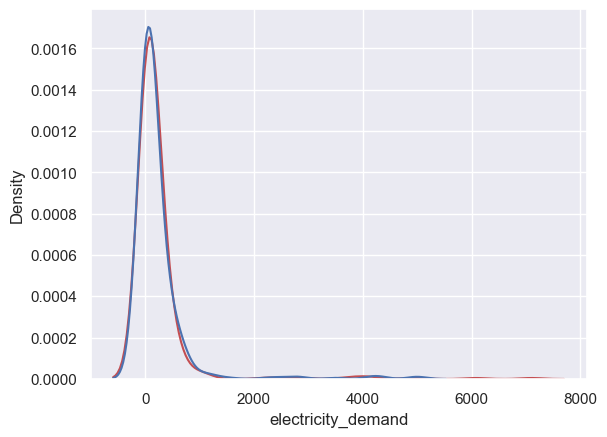

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9597870178571571
Mean Squared Error (MSE) 	: 15352.762195526926

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9499964068926652
Mean Squared Error (MSE) 	: 22320.33340881765



In [6]:
from sklearn.linear_model import LinearRegression

linreg1 = LinearRegression()
linreg1.fit(x_train, y_train)
lin_energy_train_pred = linreg1.predict(x_train)
lin_energy_test_pred = linreg1.predict(x_test)

ax=plt.axes()

sb.kdeplot(y_test, color="r",
                label= "actual value", ax=ax)
sb.kdeplot(lin_energy_test_pred, color="b",
                label= "fitted value", ax=ax)

plt.show()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, lin_energy_train_pred))
print()
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, lin_energy_test_pred))
print()

polynomial 

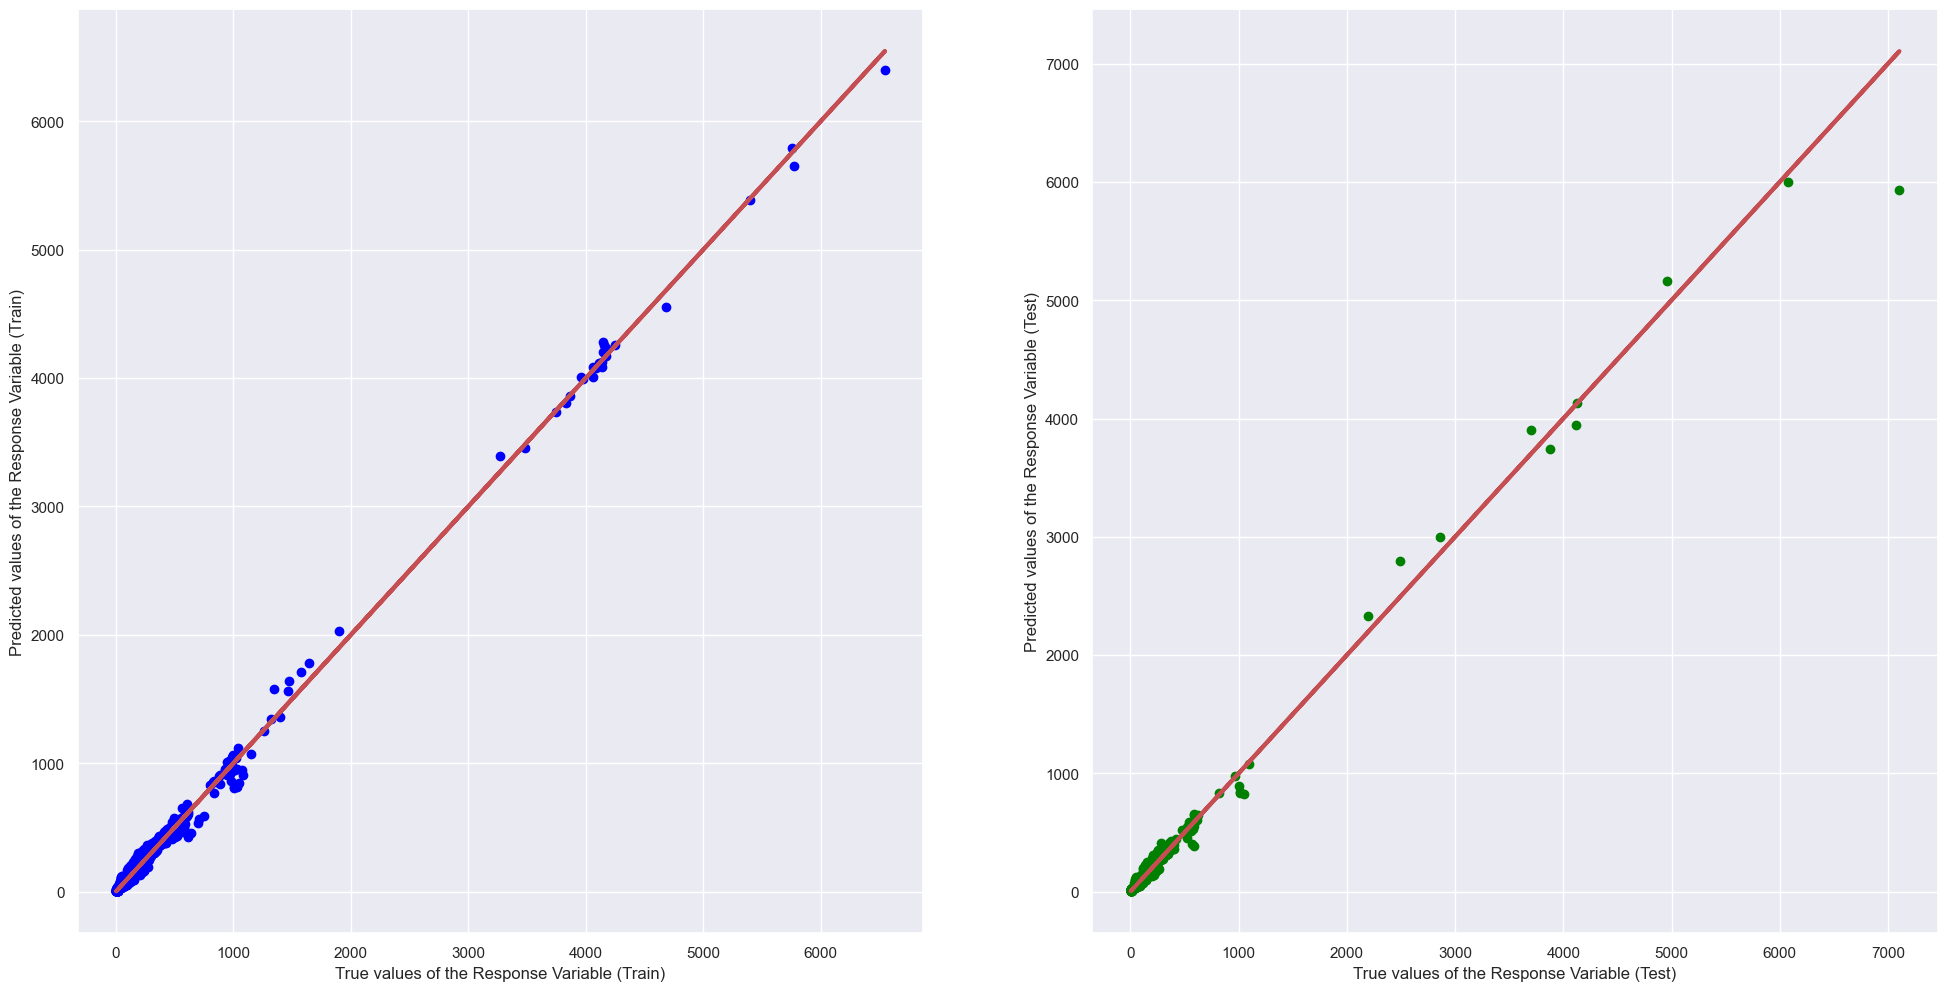



Polynomial Degree:  2 Training Set
Explained Variance (R^2) 	: 0.9970206335171713
Mean Squared Error (MSE) 	: 1137.4810488242692
Polynomial Degree:  2 Test Set
Explained Variance (R^2) 	: 0.9889664075993564
Mean Squared Error (MSE) 	: 4925.11529222962


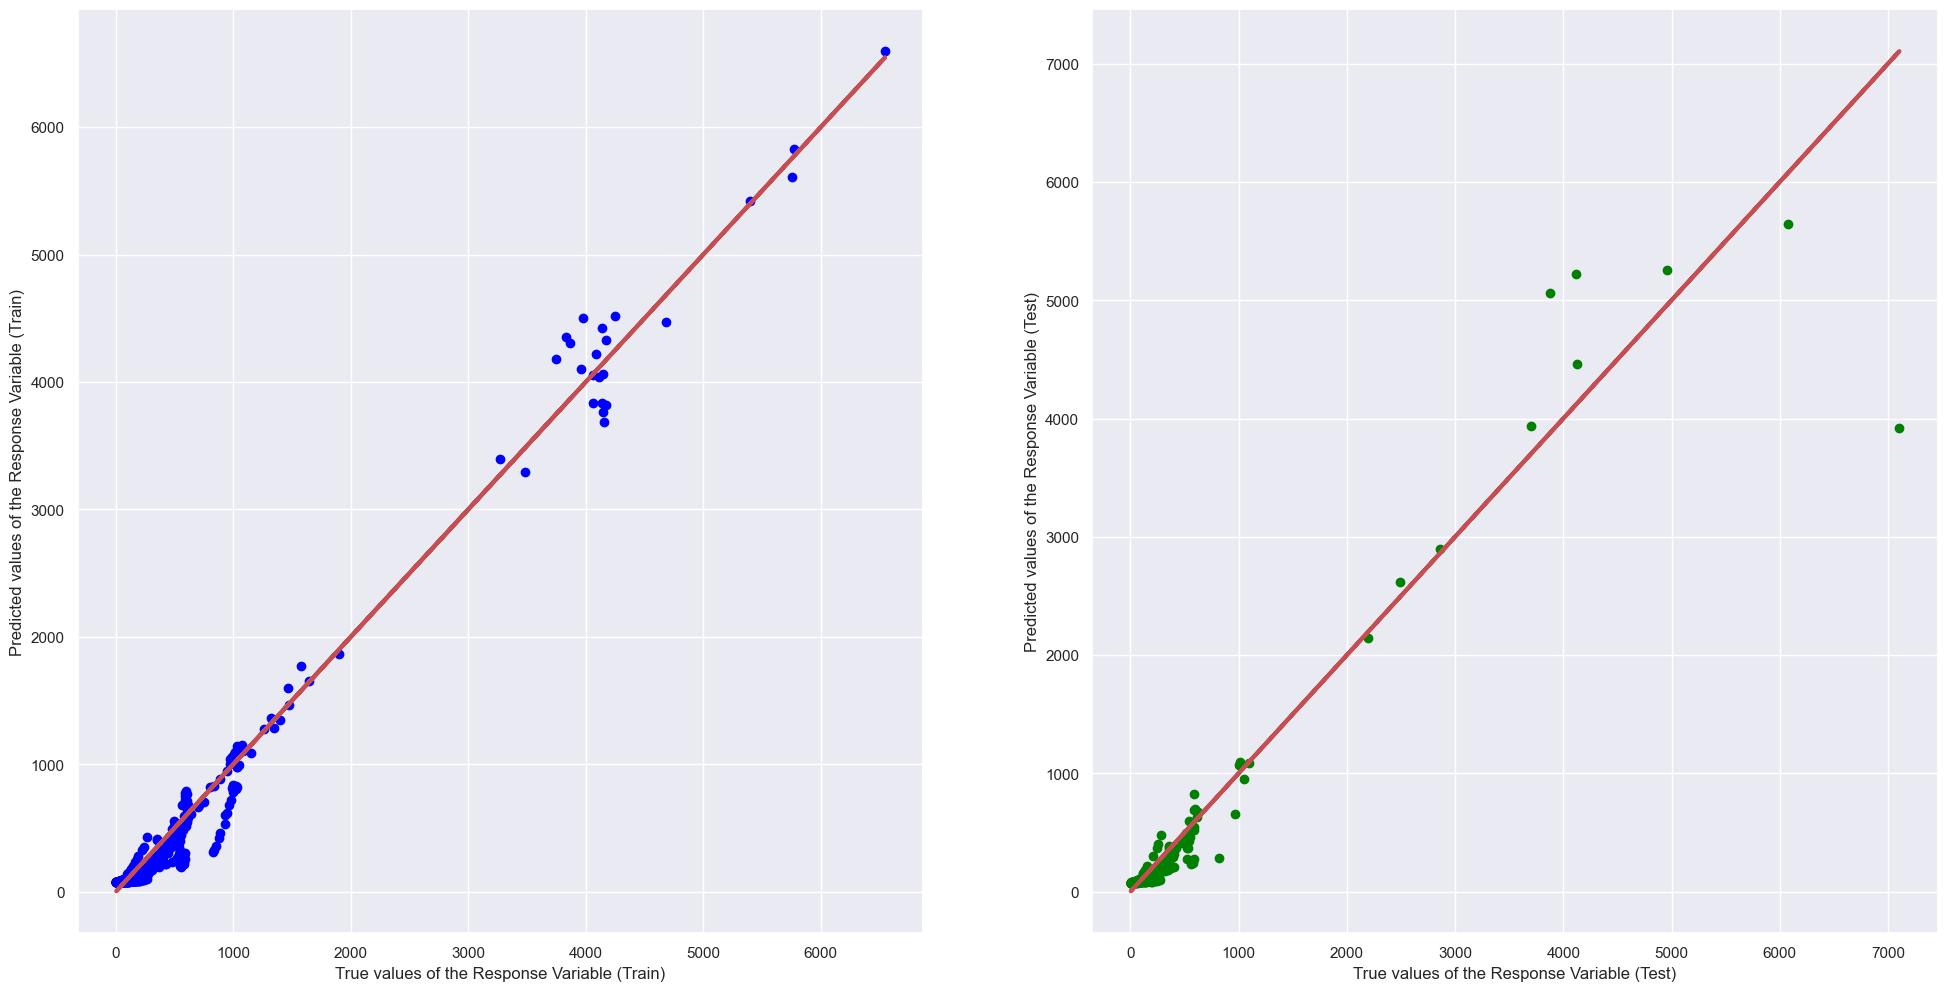



Polynomial Degree:  3 Training Set
Explained Variance (R^2) 	: 0.9790508132197977
Mean Squared Error (MSE) 	: 7998.11070175421
Polynomial Degree:  3 Test Set
Explained Variance (R^2) 	: 0.9185943029024867
Mean Squared Error (MSE) 	: 36337.434725809486


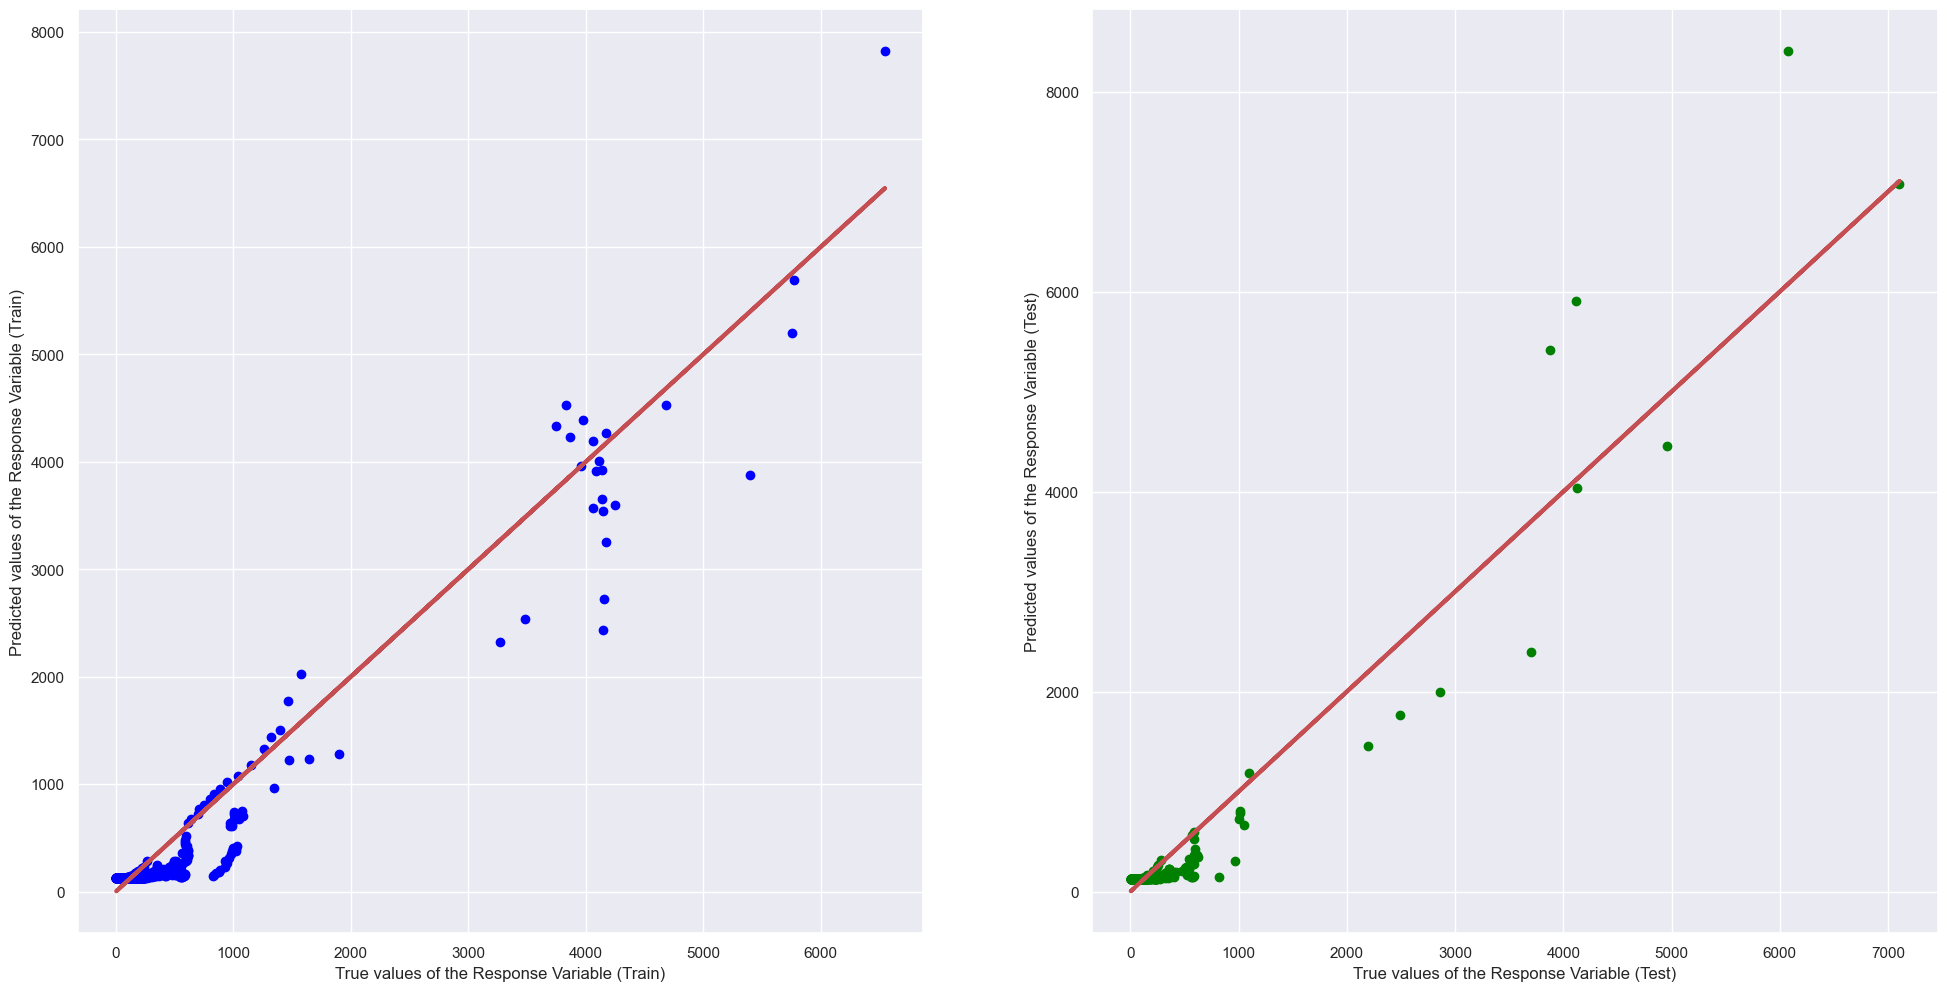



Polynomial Degree:  4 Training Set
Explained Variance (R^2) 	: 0.9167220046276486
Mean Squared Error (MSE) 	: 31794.390541101875
Polynomial Degree:  4 Test Set
Explained Variance (R^2) 	: 0.8897035854092383
Mean Squared Error (MSE) 	: 49233.51692304406


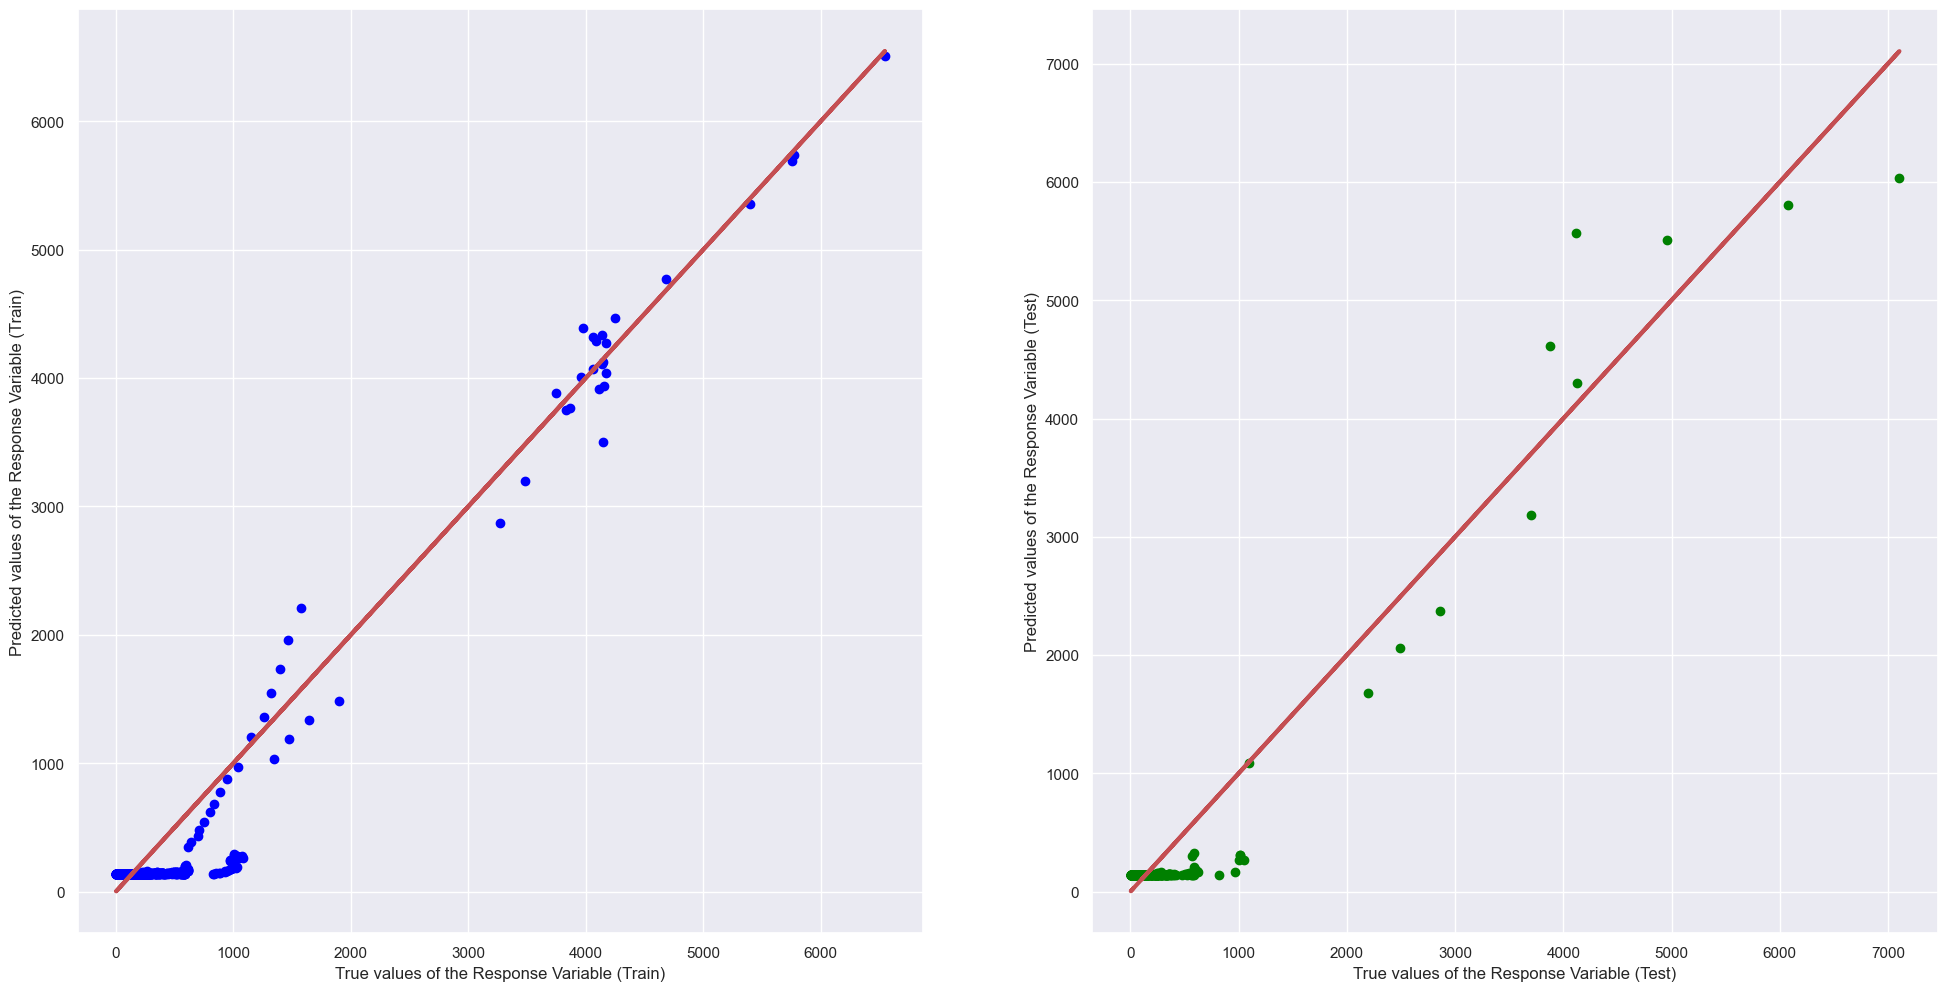



Polynomial Degree:  5 Training Set
Explained Variance (R^2) 	: 0.9083978893736437
Mean Squared Error (MSE) 	: 34972.422986667225
Polynomial Degree:  5 Test Set
Explained Variance (R^2) 	: 0.9164488907674233
Mean Squared Error (MSE) 	: 37295.09218956707


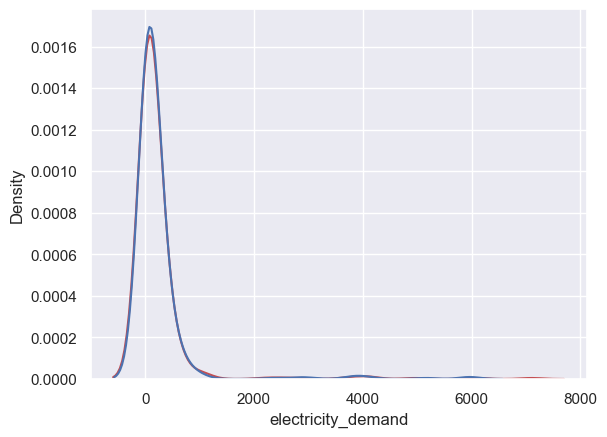

In [7]:
for i in range(2,6):
    poly = PolynomialFeatures(degree=i,include_bias=False)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test = poly.transform(x_test)
    
    polyreg = LinearRegression()
    polyreg.fit (x_poly_train, y_train)
    
    poly_y_train_pred = polyreg.predict(x_poly_train)
    poly_y_test_pred = polyreg.predict(x_poly_test)
    
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, poly_y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'r-', linewidth = 3)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, poly_y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'r-', linewidth = 3)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    plt.show()

    print('\n')
    print("Polynomial Degree: ",i,"Training Set")
    print("Explained Variance (R^2) \t:", polyreg.score(x_poly_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, poly_y_train_pred))
    
    print("Polynomial Degree: ",i,"Test Set")
    print("Explained Variance (R^2) \t:", polyreg.score(x_poly_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, poly_y_test_pred))


poly = PolynomialFeatures(degree=2,include_bias=False)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)
    
polyreg = LinearRegression()
polyreg.fit (x_poly_train, y_train)
    
poly_y_train_pred = polyreg.predict(x_poly_train)
poly_y_test_pred = polyreg.predict(x_poly_test)
ax=plt.axes()
sb.kdeplot(y_test, color="r",
                label= "actual value", ax=ax)
sb.kdeplot(poly_y_test_pred, color="b",
                label= "fitted value", ax=ax)

plt.show()

random forest

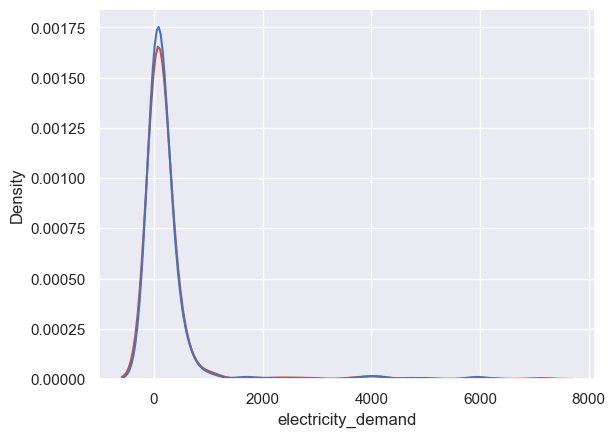

the error of the train set
The Mean Sqaured Error of the random forest: 257.1683571292637
The r2 of the random forest: 0.9993264074294099
the error of the test set
The Mean Sqaured Error of the random forest: 6673.686110107831
The r2 of the random forest: 0.9850491353035044


In [9]:


RForestmodel = RandomForestRegressor(n_estimators=1000)
RForestmodel.fit(x_train, y_train)
y_pred_randomforest = RForestmodel.predict(x_test)
y_pred_randomforest_train = RForestmodel.predict(x_train)
df_randomforest = pd.DataFrame({"actual":y_test, "predict": y_pred_randomforest})
df_randomforest
ax=plt.axes()
sb.kdeplot(y_test, color="r",
                label= "actual value", ax=ax)
sb.kdeplot(y_pred_randomforest, color="b",
                label= "fitted value", ax=ax)

plt.show()
print('the error of the train set')
RForestmean_squared_error_train = mean_squared_error(y_train, y_pred_randomforest_train)
print("The Mean Sqaured Error of the random forest:", RForestmean_squared_error_train)
RForest_R2_train = r2_score(y_train, y_pred_randomforest_train)
print("The r2 of the random forest:", RForest_R2_train)
print('the error of the test set')
RForestmean_squared_error = mean_squared_error(y_test, y_pred_randomforest)
print("The Mean Sqaured Error of the random forest:", RForestmean_squared_error)
RForest_R2 = r2_score(y_test, y_pred_randomforest)
print("The r2 of the random forest:", RForest_R2)


In [13]:
name= input("what is your file name?")
showcase = pd.read_csv(name)
showcase = pd.DataFrame(showcase)
showcase_x = showcase[['population', 'gdp', 'clean_cons_per_capita', 'clean_consumption', 'clean_share_energy', 'fossil_cons_per_capita', 
                            'fossil_consumption', 'fossil_share_energy', 'energy_per_gdp' ]]
y_pred_randomforest_showcase = RForestmodel.predict(showcase_x)

print("The estimated energy demand:", y_pred_randomforest_showcase, "terrawatthour" )

The estimated energy demand: [65.23199] terrawatthour


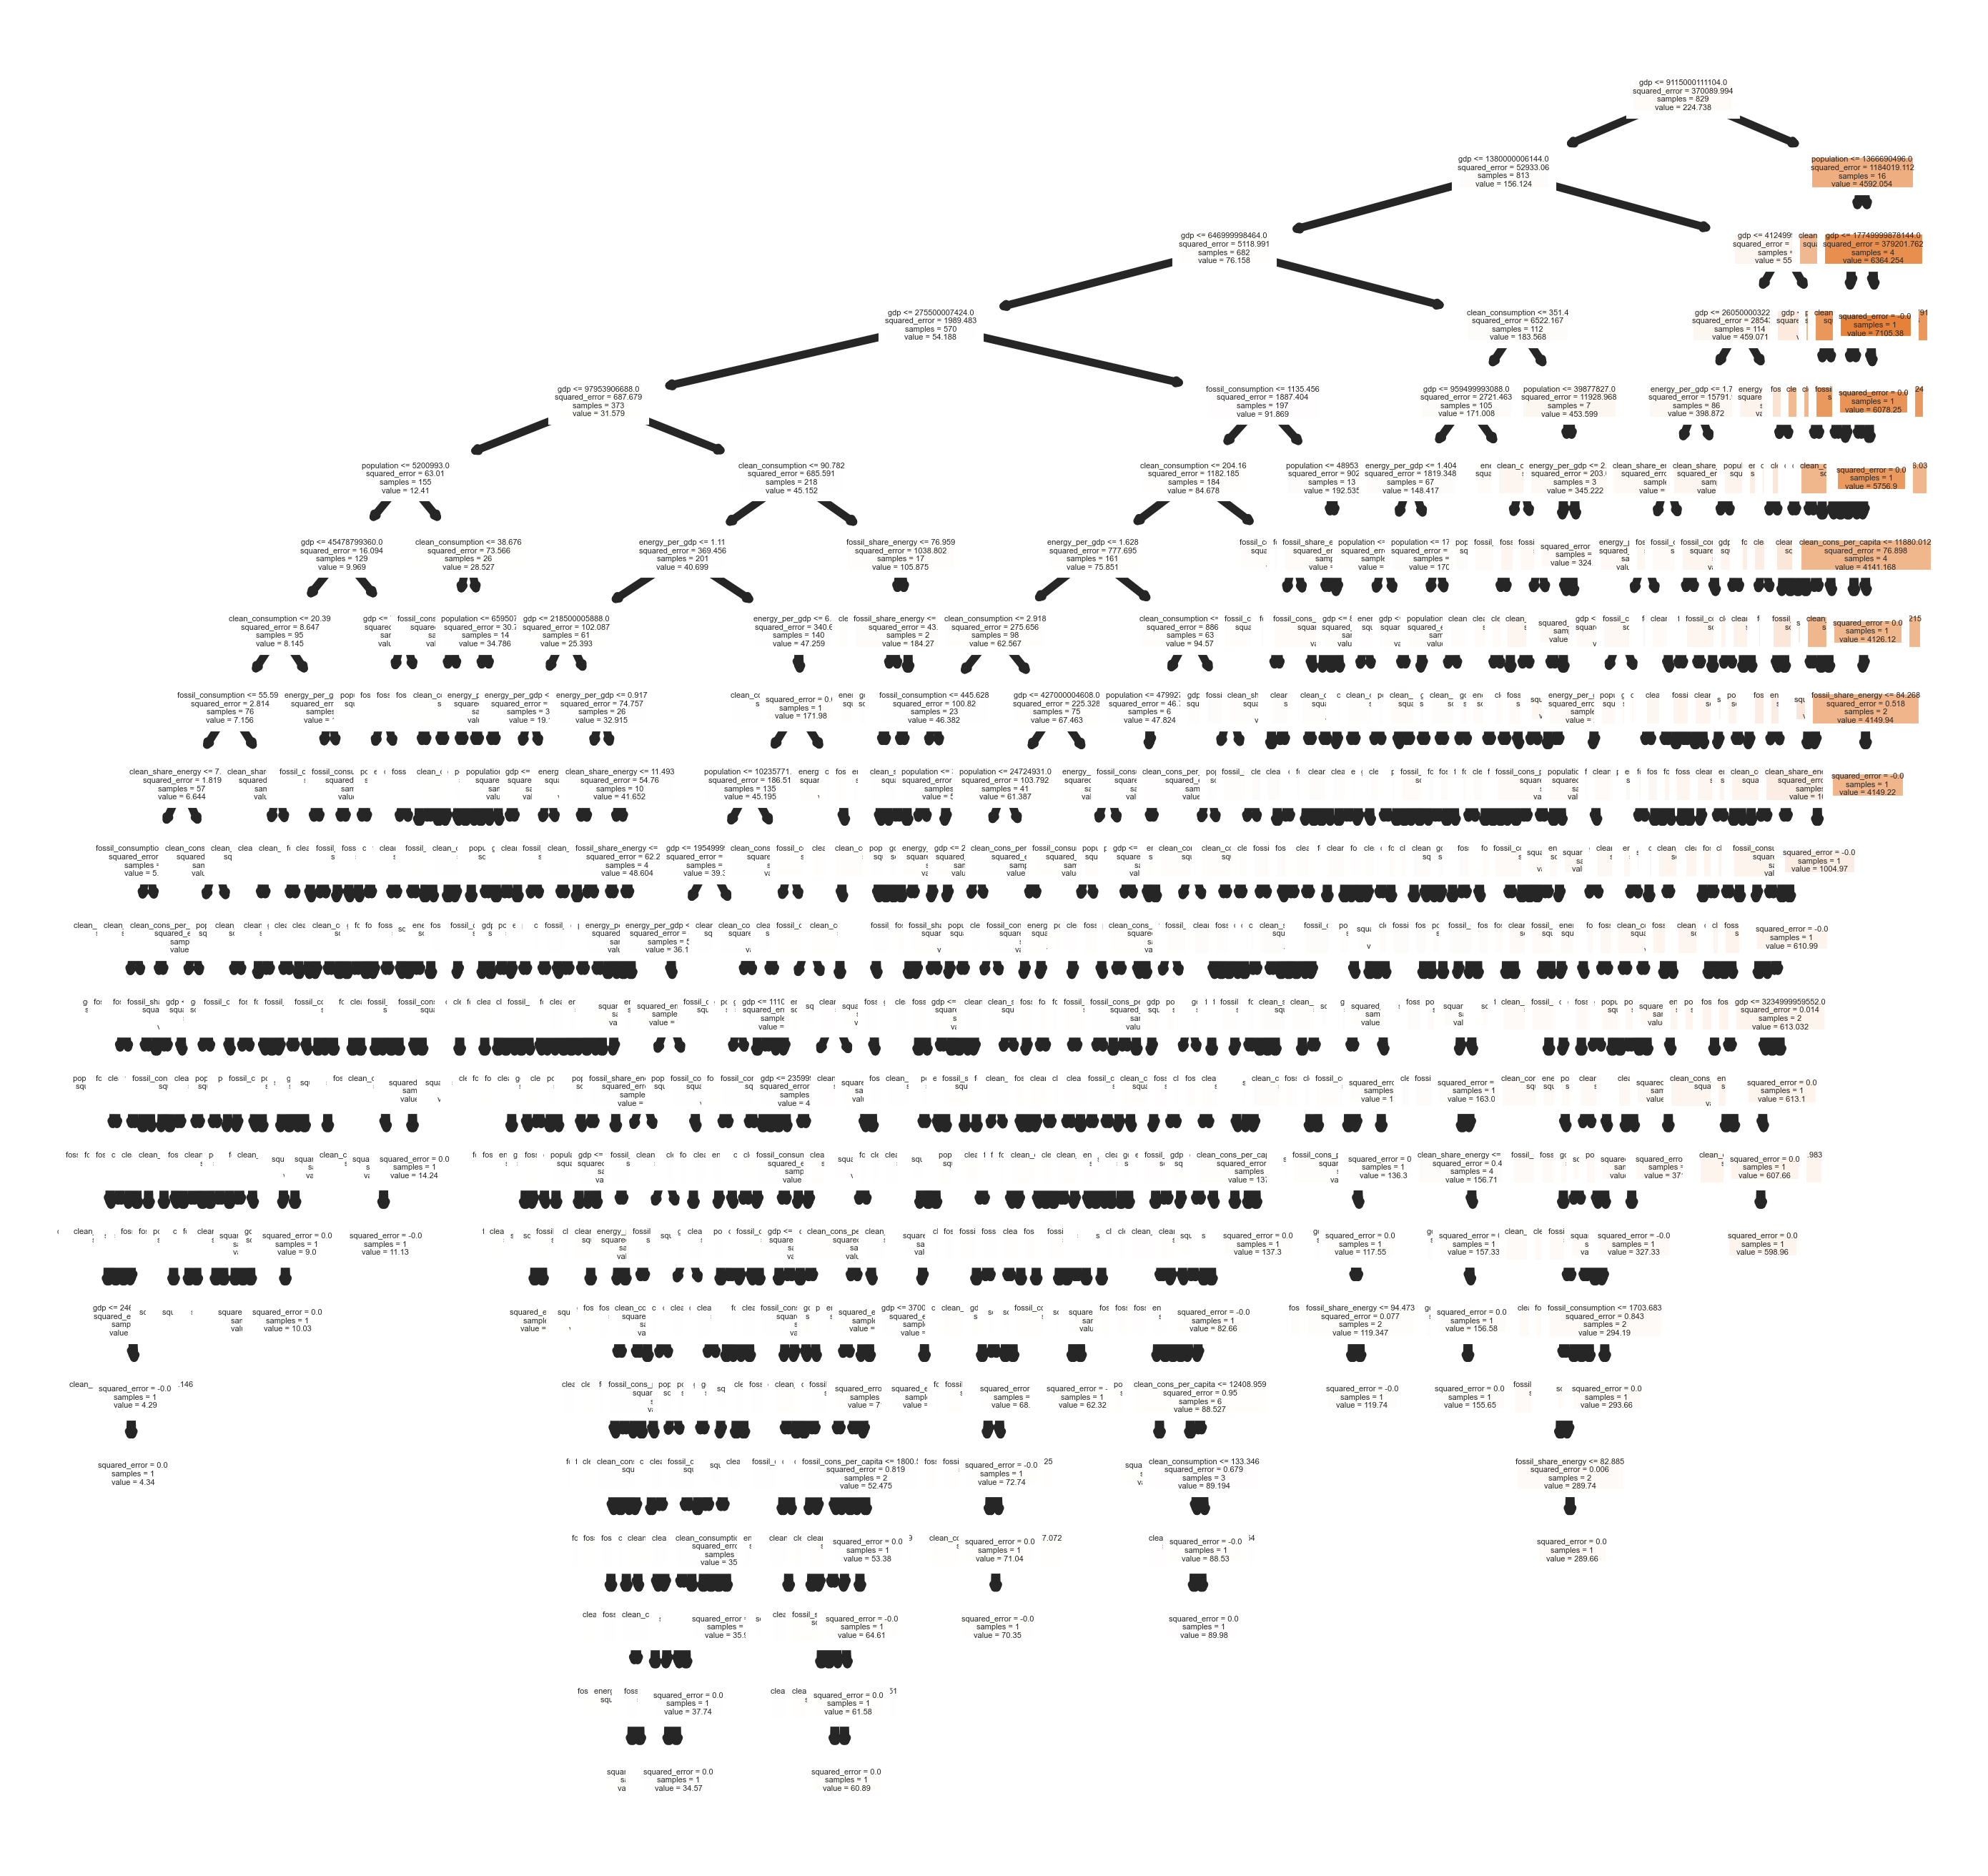

In [ ]:
fn=['population', 'gdp', 'clean_cons_per_capita', 'clean_consumption', 'clean_share_energy', 'fossil_cons_per_capita', 
'fossil_consumption', 'fossil_share_energy', 'energy_per_gdp' ]
cn=['electricity_demand']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(RForestmodel.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True)
fig.savefig('rf_individualtree.png')
                  



XGBoost

In [ ]:

import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


# Load data from a CSV file
data = pd.read_csv('cleaned.csv')

# Define feature columns and target variable
feature_columns = ['population', 'gdp', 'clean_cons_per_capita', 'clean_consumption', 'clean_share_energy', 'fossil_cons_per_capita', 'fossil_consumption', 'fossil_share_energy', 'energy_per_gdp']
electricity_demand = 'electricity_demand'

X = data[feature_columns]
y = data[electricity_demand]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the XGBoost model with some regularization
model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, max_depth=4, reg_lambda=1, reg_alpha=0.1)
model.fit(X_train, y_train)

# Perform cross-validation and print the mean R^2 score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Mean cross-validated R^2 score: {cv_scores.mean():.5f}")

# Make predictions on both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MSE and R^2 values for both training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.5f}")
print(f"Test MSE: {test_mse:.5f}")
print(f"Train R^2: {train_r2:.5f}")
print(f"Test R^2: {test_r2:.5f}")

# Plot actual vs predicted values for both training and testing sets
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue', label='Train')
plt.scatter(y_test, y_test_pred, alpha=0.5, color='red', label='Test')
plt.xlabel('True Electricity Demand')
plt.ylabel('Predicted Electricity Demand')
plt.title('Actual vs Predicted Values (Train and Test)')
plt.legend()
plt.show()

trees_per_figure, nrows, ncols = 4, 2, 2
n_figures = -(-model.n_estimators // trees_per_figure)

for f in range(n_figures):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 30), dpi=80)
    for i, ax in enumerate(axes.flatten()):
        tree_index = f * trees_per_figure + i
        if tree_index < model.n_estimators:
            xgb.plot_tree(model, ax=ax, fontsize=12, num_trees=tree_index)
            ax.set_title(f'Tree {tree_index}')
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

suport vector

In [4]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv('cleaned.csv')


from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'epsilon': [0.01, 0.1, 1, 10]}

# Create an instance of the SVR model
svr = SVR(kernel='rbf')

# Perform a grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best C value:", grid_search.best_params_['C'])
print("Best epsilon value:", grid_search.best_params_['epsilon'])

# Train an SVR model
model = SVR(kernel='linear', C=100, epsilon=10)
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Best C value: 100
Best epsilon value: 10


In [ ]:

import json
import ipywidgets as widgets
from ipyleaflet import Map, GeoJSON, Choropleth, basemaps, LayerGroup
import branca.colormap as cm



# read the geojson data
with open('custom.geo.json') as f:
    geo_json_data = json.load(f)
    for d in geo_json_data["features"]:
        d["name"] = d["properties"]["name"]
       
# get the min and max year available
min_year = energyData['year'].min()
max_year = energyData['year'].max()
print(min_year)
print(max_year)




KeyError: 'year'

In [ ]:
# create the base map
m = Map(center=(0, 0), zoom=2, basemap=basemaps.CartoDB.Positron)
# name changer
proper_name_mapping = {
    "Russian Federation":"Russia",
    "Czech Republic":"Czechia",
    "Macedonia, FYR":"Macedonia",
    "Central African Republic":"Central African Rep.",
    "Bosnia and Herzegovina":"Bosnia and Herz.",
    "Slovak Republic":"Slovakia",
    "Iran, Islamic Rep.":"Iran",
    "Somaliland":"Somalia",
    "Dominican Republic":"Dominican Rep.",
    "Venezuela, RB":"Venezuela",
    "Lao PDR":"Laos",
    "Yemen, Rep.":"Yemen",
    "South Sudan":"S. Sudan",
    "Papua New Guinea":"Guinea",
    "Congo, Rep.":"Congo",
    "Congo, Dem. Rep.":"Dem. Rep. Congo",
    "Cyprus, Northern":"N. Cyprus",
    "Kyrgyz Republic":"Kyrgyzstan",
    "Korea, Dem. Rep.":"South Korea",
    "Palestine (West Bank and Gaza)":"Palestinian",
    "Syrian Arab Republic":"Syria",
    "Egypt, Arab Rep.":"Egypt",
    "Gambia, The":"Gambia"

}


# create a colormap
color_scale = cm.LinearColormap(colors=['green', 'yellow', 'red'], vmin=0, vmax=energyData['gdp'].max())

def update_choropleth(year):
    # filter the data for the current year and remove the rows where the GDP value is missing
    
    try:
        choro_data = energyData.loc[(energyData['year'] == year) & (energyData['gdp'].notna()),].copy()
    except KeyError:
        # If a KeyError is raised, add a new row with 'gdp' equal to 0 for each missing country value
        missing_countries = set(energyData['country']) - set(choro_data['country'])
        new_rows = [{'year': year, 'country': country, 'gdp': 0} for country in missing_countries]
        new_df = pd.DataFrame(new_rows)
        choro_data = choro_data.append(new_df, ignore_index=True)

    
        
    choro_data  = dict(zip(choro_data["country"].tolist(), choro_data["gdp"]))
    for d in geo_json_data["features"]:
        if d["name"] in proper_name_mapping.keys():
            choro_data[d["name"]] = choro_data[proper_name_mapping[d["name"]]]
        elif d["name"] in choro_data:
            choro_data[d["name"]] = choro_data[d["name"]]
        else:
            choro_data[d["name"]] = 0

    print (choro_data)
    # create a choropleth layer
    choropleth_layer = Choropleth(
        geo_data=geo_json_data,
        choro_data=choro_data,
        colormap=color_scale,
        style={'fillOpacity': 1.0, 'weight': 0.5},
        name='GDP Choropleth',
        key_on= "name"
    )
    
    # remove the previous choropleth layer (if any) and add the new one
    layer_group.clear_layers()
    layer_group.add_layer(choropleth_layer)

# create a layer group to hold the choropleth layer
layer_group = LayerGroup()
m.add_layer(layer_group)
# display the map
display(m)

# add the slider to the map

widgets.interact(update_choropleth, year=widgets.IntSlider(min=min_year, max=max_year, step=1, value=min_year))







Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

interactive(children=(IntSlider(value=1900, description='year', max=2022, min=1900), Output()), _dom_classes=(…

<function __main__.update_choropleth(year)>